# rMATS for quantification of alternative splicing

[rMATS](http://rnaseq-mats.sourceforge.net/) is one of many alternative splicing algorithms out there. I like this one because it allows for a direct comparison between two conditions and considers information from replicates.

How would you go about installing rMATS? [Hint](http://lmgtfy.com/?q=is+rmats+available+on+bioconda%3F)

Did your install work? you probably checked it with:

    which rmats
    
That's weird, it says no rmats available? But we just installed it! Let's go check out our anaconda bin

    cd ~/anaconda2/bin
    
    ls -ltr
    
ls -ltr will display files in the reverse order they were made. So the newest files will appear at the bottom of our screen. Oh look, the command that rMATS runs is called RNASeq-MATS.py. Now I see that when I scroll down in the manual. Okay, great. Now I can look into running the program.

**Alternative Install**

So I found this version to be buggy and not work. Sometimes this happens. The only way to know this is to try it out and see if you get any errors. I did, so instead of using the version on bioconda, we are going to downlaod the source code from the website and install it from there. 

I would recommend making a software folder in your home directory:
    
    mkdir ~/software
    
Copy the file from the shared biom262 folder into your software folder and unzip it

    cp /projects/ps-yeolab/biom262_2017/rmats/rMATS.3.2.5.tgz ~/software/
    
    tar -xvf rMATS.3.2.5.tgz
    
They even give you a nice test script in there to make sure everything that you need is downloaded properly. Test it out!

You might get some warning that looks like "module pysam does not exist". Don't panic, you know how to solve this error! 

    conda install pysam
    
Once your test script runs okay, go ahead and write a submission script to run an alternative splicing analysis on our data.    

**Job submission parameters**

rMATS is slow and takes a lot of memory. So we are going to submit the job to run on 16 processors and for 24 hours. You guys can figure it out, write a script and run it on the u2af1 shrna samples we have been working with.

**output**

I have put some of the output files in the biom262 folder for us to look at. Let's load them up.

In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
directory = "/projects/ps-yeolab/biom262_2017/rmats/"

In [33]:
SE = pd.read_table(directory+"U2AF1-LV08-K562-SE.MATS.JunctionCountOnly.txt",
                  index_col=0)
SE.set_index("GeneID", inplace=True)
SE.head()

,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000117748.5,RPA2,chr1,-,28224143,28224218,28223515,28223632,28233438,28233552,10981,...,"55,56","419,503","5,3",173,99,0,0,"0.821,0.842","0.98,0.99",-0.154
ENSG00000173915.8,USMG5,chr10,-,105155502,105155789,105152138,105152223,105156165,105156198,11710,...,"696,683","161,178","615,619",197,99,0,0,"0.032,0.019","0.116,0.126",-0.096
ENSG00000166902.4,MRPL16,chr11,-,59576205,59576345,59574708,59575322,59577327,59577495,12295,...,"74,66","9,17","159,170",197,99,0,0,"0.407,0.511","0.028,0.048",0.421
ENSG00000166902.4,MRPL16,chr11,-,59576205,59576349,59574708,59575322,59577327,59577495,12296,...,"74,66","6,13","159,170",197,99,0,0,"0.3,0.379","0.019,0.037",0.311
ENSG00000015479.13,MATR3,chr5,+,138651393,138651427,138645731,138650425,138651764,138651837,12763,...,"202,240","119,149","34,56",132,99,0,0,"0.213,0.194","0.724,0.666",-0.492


In [50]:
print len(SE)
SE_sig = SE.loc[SE['FDR'] < 0.05]
print len(SE_sig)
SE_sig.head()

42728
2257


,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000117748.5,RPA2,chr1,-,28224143,28224218,28223515,28223632,28233438,28233552,10981,...,"55,56","419,503","5,3",173,99,0,0,"0.821,0.842","0.98,0.99",-0.154
ENSG00000173915.8,USMG5,chr10,-,105155502,105155789,105152138,105152223,105156165,105156198,11710,...,"696,683","161,178","615,619",197,99,0,0,"0.032,0.019","0.116,0.126",-0.096
ENSG00000166902.4,MRPL16,chr11,-,59576205,59576345,59574708,59575322,59577327,59577495,12295,...,"74,66","9,17","159,170",197,99,0,0,"0.407,0.511","0.028,0.048",0.421
ENSG00000166902.4,MRPL16,chr11,-,59576205,59576349,59574708,59575322,59577327,59577495,12296,...,"74,66","6,13","159,170",197,99,0,0,"0.3,0.379","0.019,0.037",0.311
ENSG00000015479.13,MATR3,chr5,+,138651393,138651427,138645731,138650425,138651764,138651837,12763,...,"202,240","119,149","34,56",132,99,0,0,"0.213,0.194","0.724,0.666",-0.492


number of events = 2257


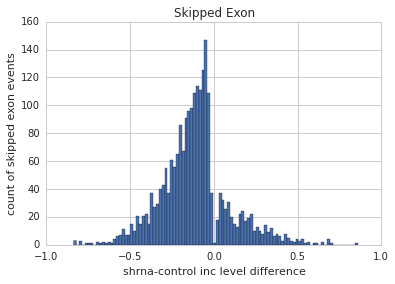

In [65]:
sns.set_style("whitegrid")
plt.hist(SE_sig['IncLevelDifference'],bins=100)
plt.xlabel("shrna-control inc level difference")
plt.ylabel("count of skipped exon events")
plt.title("Skipped Exon")
print "number of events = "+str(len(SE_sig))

In [39]:
SE_sig.sort(columns = "IncLevelDifference", ascending=False).head(50)

/home/ecwheele/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000151276.19,MAGI1,chr3,-,65433696,65433732,65428466,65428524,65438932,65439015,25444,...,"1,1","0,1","8,10",134,99,3.858725e-08,3.201468e-06,"0.912,0.881","0.0,0.069",0.862
ENSG00000166747.8,AP1G1,chr16,-,71841703,71841741,71823222,71823385,71841917,71842053,57222,...,"1,0","1,2","2,7",136,99,1.344873e-03,2.854631e-02,"0.836,1.0","0.267,0.172",0.698
ENSG00000182149.16,IST1,chr16,+,71957141,71957287,71956428,71956583,71961516,71962877,19904,...,"1,2","1,2","2,8",197,99,4.244706e-05,1.595490e-03,"0.905,0.79","0.201,0.112",0.691
ENSG00000092140.10,G2E3,chr14,+,31059737,31059870,31058588,31058690,31061528,31061653,41790,...,"3,13","6,4","51,53",197,99,4.340972e-14,9.227913e-12,"0.887,0.582","0.056,0.037",0.688
ENSG00000105953.10,OGDH,chr7,+,44695916,44695961,44687042,44687133,44706334,44706450,22319,...,"7,0","0,0","20,25",143,99,1.829178e-03,3.679616e-02,"0.372,1.0","0.0,0.0",0.686
ENSG00000092140.10,G2E3,chr14,+,31059737,31059931,31058588,31058690,31061528,31061653,41787,...,"3,13","6,4","51,53",197,99,3.108624e-14,6.742401e-12,"0.867,0.582","0.056,0.037",0.678
ENSG00000129187.10,DCTD,chr4,-,183837033,183837041,183836613,183836728,183837571,183837692,66467,...,"6,2","4,2","16,22",106,99,7.242323e-08,5.636612e-06,"0.737,0.837","0.189,0.078",0.653
ENSG00000120725.8,SIL1,chr5,-,138463632,138463741,138463427,138463542,138533957,138533993,22189,...,"3,0","3,6","11,12",197,99,7.265603e-04,1.736268e-02,"0.626,1.0","0.121,0.201",0.652
ENSG00000171159.4,C9orf16,chr9,+,130924282,130925231,130922592,130922765,130925721,130926169,38271,...,"3,1","10,7","26,33",197,99,9.578512e-07,5.788835e-05,"0.648,0.834","0.162,0.096",0.612


In [45]:
SE_sig.loc[SE_sig['geneSymbol'] == "U2AF1"]

,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000160201.7,U2AF1,chr21,-,44521475,44521542,44520562,44520629,44524424,44524512,37936,...,"31,13","274,369","476,521",165,99,0.000000e+00,0.000000e+00,"0.659,0.764","0.257,0.298",0.434
ENSG00000160201.7,U2AF1,chr21,-,44520562,44520650,44515811,44515853,44524424,44524512,37940,...,"6,4","815,869","0,7",186,99,1.199268e-09,1.334436e-07,"0.832,0.869","1.0,0.985",-0.142
ENSG00000160201.7,U2AF1,chr21,-,44520562,44520629,44515803,44515853,44524424,44525362,37942,...,"6,4","1285,1385","0,7",165,99,1.488564e-09,1.626684e-07,"0.891,0.904","1.0,0.992",-0.099
ENSG00000160201.7,U2AF1,chr21,-,44520562,44520650,44515811,44515853,44521475,44521542,37939,...,"83,63","815,867","361,497",186,99,1.862318e-09,2.009422e-07,"0.257,0.297","0.546,0.481",-0.237
ENSG00000160201.7,U2AF1,chr21,-,44520562,44520629,44515803,44515853,44521475,44521542,37943,...,"83,63","840,890","361,497",165,99,1.076428e-07,8.097468e-06,"0.316,0.36","0.583,0.518",-0.213
ENSG00000160201.7,U2AF1,chr21,-,44521475,44521542,44515803,44515853,44524424,44524512,37934,...,"6,4","603,839","0,7",165,99,6.565003e-05,2.322098e-03,"0.945,0.949","1.0,0.986",-0.046


In [54]:
A3SS = pd.read_table(directory+"U2AF1-LV08-K562-A3SS.MATS.JunctionCountOnly.txt",
                    index_col="GeneID")
print A3SS.shape
A3SS_sig = A3SS.loc[A3SS['FDR'] < 0.05]
print A3SS_sig.shape
A3SS_sig.head()

(12586, 22)
(280, 22)


,ID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000255717.2,10311,SNHG1,chr11,-,62621272,62621536,62621272,62621305,62621990,62622023,...,"557,661","555,702","119,127",197,99,0,0,"0.465,0.451","0.701,0.735",-0.260
ENSG00000255717.2,10313,SNHG1,chr11,-,62621272,62621461,62621272,62621305,62621990,62622023,...,"557,661","182,222","119,127",197,99,0,0,"0.18,0.136","0.435,0.468",-0.293
ENSG00000185686.13,11471,PRAME,chr22,-,22899231,22899350,22899231,22899329,22899964,22900000,...,"248,223","1390,1562","514,651",119,99,0,0,"0.853,0.864","0.692,0.666",0.179
ENSG00000185686.13,11474,PRAME,chr22,-,22899231,22899397,22899231,22899329,22899964,22900000,...,"248,223","1460,1604","514,651",166,99,0,0,"0.806,0.821","0.629,0.595",0.202
ENSG00000234741.3,11808,GAS5,chr1,-,173833394,173833644,173833394,173833442,173833812,173833835,...,"178,221","2121,2665","42,104",197,99,0,0,"0.832,0.834","0.962,0.928",-0.112


number of events = 280


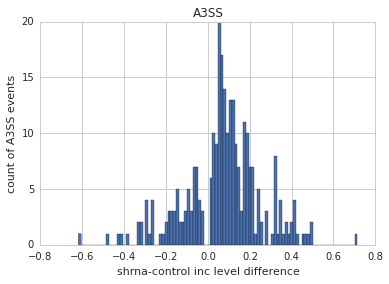

In [66]:
plt.hist(A3SS_sig['IncLevelDifference'], bins=100)
plt.xlabel("shrna-control inc level difference")
plt.ylabel("count of A3SS events")
plt.title("A3SS")
print "number of events = "+str(len(A3SS_sig))

In [56]:
A3SS_filtered.sort(columns="IncLevelDifference", ascending=False).head()

/home/ecwheele/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000085231.9,150,TAF9,chr5,-,68662329,68662552,68662329,68662422,68664453,68664510,...,"0,1","6,3","9,7",197,99,0.000077,0.005307,"1.0,0.858","0.251,0.177",0.715
ENSG00000185722.12,3385,ANKFY1,chr17,-,4071129,4071374,4071129,4071205,4072491,4072582,...,"4,2","4,3","15,9",197,99,0.000075,0.005288,"0.693,0.557","0.118,0.143",0.494
ENSG00000139641.8,6714,ESYT1,chr12,+,56527863,56527965,56527893,56527965,56527564,56527657,...,"66,60","33,24","194,210",128,99,0.000000,0.000000,"0.563,0.619","0.116,0.081",0.492
ENSG00000135473.10,15827,PAN2,chr12,-,56720096,56720217,56720096,56720193,56720400,56720743,...,"12,2","2,9","30,37",122,99,0.000166,0.010493,"0.468,0.709","0.051,0.165",0.481
ENSG00000185043.6,14778,CIB1,chr15,-,90775450,90775679,90775450,90775559,90776900,90776935,...,"23,18","18,31","66,70",197,99,0.000000,0.000000,"0.601,0.63","0.121,0.182",0.464


In [57]:
A5SS = pd.read_table(directory+"U2AF1-LV08-K562-A5SS.MATS.JunctionCountOnly.txt",
                    index_col="GeneID")
print A5SS.shape
A5SS_sig = A5SS.loc[A5SS['FDR'] < 0.05]
print A5SS_sig.shape
A5SS_sig.head()

(7339, 22)
(69, 22)


,ID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000135018.9,4520,UBQLN1,chr9,-,86281264,86284242,86284099,86284242,86279944,86280060,...,"71,79","216,344","9,19",197,99,0,0,"0.579,0.545","0.923,0.901",-0.350
ENSG00000041357.11,6475,PSMA4,chr15,+,78834518,78834987,78834518,78834561,78836531,78836609,...,"45,53","499,529","7,4",197,99,0,0,"0.792,0.793","0.973,0.985",-0.186
ENSG00000149273.10,6912,RPS3,chr11,+,75112683,75113490,75112683,75112777,75115063,75115251,...,"85,94","2840,3876","24,59",197,99,0,0,"0.896,0.838","0.983,0.971",-0.110
ENSG00000234741.3,7302,GAS5,chr1,-,173833621,173833842,173833812,173833842,173833394,173833442,...,"178,221","1765,2260","42,104",197,99,0,0,"0.792,0.798","0.955,0.916",-0.140
ENSG00000265681.2,8826,RPL17,chr18,-,47017774,47017977,47017901,47017977,47017162,47017297,...,"244,292","13678,15409","52,52",197,99,0,0,"0.971,0.967","0.992,0.993",-0.023


number of events = 69


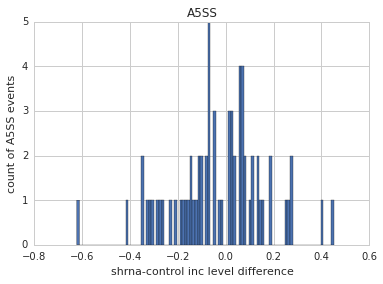

In [67]:
plt.hist(A5SS_sig['IncLevelDifference'], bins=100)
plt.xlabel("shrna-control inc level difference")
plt.ylabel("count of A5SS events")
plt.title("A5SS")
print "number of events = "+str(len(A5SS_sig))

In [60]:
MXE = pd.read_table(directory+"U2AF1-LV08-K562-MXE.MATS.JunctionCountOnly.txt",
                    index_col="GeneID")
print MXE.shape
MXE_sig = MXE.loc[MXE['FDR'] < 0.05]
print MXE_sig.shape
MXE_sig.head()

(6886, 24)
(470, 24)


,ID,geneSymbol,chr,strand,1stExonStart_0base,1stExonEnd,2ndExonStart_0base,2ndExonEnd,upstreamES,upstreamEE,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000138069.12,234,RAB1A,chr2,-,65316072,65316204,65318116,65318212,65315004,65315824,...,"253,227","1,2","318,347",194,197,0,0,"0.141,0.139","0.003,0.006",0.136
ENSG00000091140.8,352,DLD,chr7,+,107533644,107533723,107542182,107542262,107531617,107531734,...,"31,35","338,454","3,2",177,178,0,0,"0.866,0.801","0.991,0.996",-0.160
ENSG00000160201.7,4448,U2AF1,chr21,-,44520562,44520629,44521475,44521542,44515803,44515853,...,"82,63","603,839","1285,1385",165,165,0,0,"0.677,0.661","0.319,0.377",0.321
ENSG00000255717.2,4613,SNHG1,chr11,-,62621272,62621305,62621990,62622023,62621023,62621062,...,"568,711","110,122","242,275",131,131,0,0,"0.599,0.583","0.313,0.307",0.281
ENSG00000255717.2,4627,SNHG1,chr11,-,62621990,62622023,62622359,62622410,62621272,62621305,...,"1482,1747","464,385","240,256",149,131,0,0,"0.185,0.19","0.63,0.569",-0.412


number of events = 470


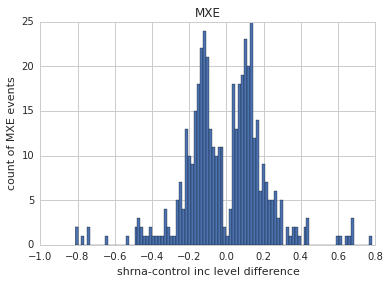

In [68]:
plt.hist(MXE_sig['IncLevelDifference'], bins=100)
plt.xlabel("shrna-control inc level difference")
plt.ylabel("count of MXE events")
plt.title("MXE")
print "number of events = "+str(len(MXE_sig))

In [62]:
RI = pd.read_table(directory+"U2AF1-LV08-K562-RI.MATS.JunctionCountOnly.txt",
                    index_col="GeneID")
print RI.shape
RI_sig = RI.loc[RI['FDR'] < 0.05]
print RI_sig.shape
RI_sig.head()

(4388, 22)
(262, 22)


,ID,geneSymbol,chr,strand,riExonStart_0base,riExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
GeneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000135486.13,1138,HNRNPA1,chr12,+,54675169,54675725,54675169,54675286,54675578,54675725,...,"5594,5655","138,185","7468,8536",197,99,0,0,"0.029,0.032","0.009,0.011",0.021
ENSG00000075624.9,2951,ACTB,chr7,-,5567911,5569031,5567911,5568350,5568791,5569031,...,"744,379","25,54","975,1614",197,99,0,0,"0.053,0.092","0.013,0.017",0.057
ENSG00000143418.15,3702,CERS2,chr1,-,150939231,150939678,150939231,150939338,150939549,150939678,...,"484,496","37,43","386,530",197,99,0,0,"0.155,0.171","0.046,0.039",0.121
ENSG00000160201.7,4033,U2AF1,chr21,-,44520562,44524512,44520562,44520629,44524424,44524512,...,"31,13","73,117","476,521",197,99,0,0,"0.532,0.73","0.072,0.101",0.544
ENSG00000204628.7,6459,GNB2L1,chr5,-,180663928,180664719,180663928,180664042,180664608,180664719,...,"676,499","58,83","1029,1568",197,99,0,0,"0.102,0.13","0.028,0.026",0.089


number of events = 262


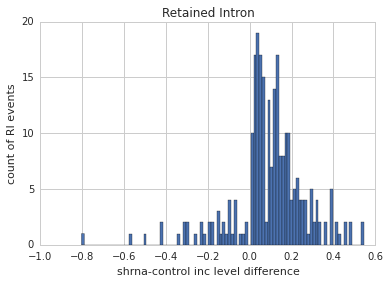

In [64]:
plt.hist(RI_sig['IncLevelDifference'], bins=100)
plt.xlabel("shrna-control inc level difference")
plt.ylabel("count of RI events")
plt.title("Retained Intron")
print "number of events = "+str(len(RI_sig))